<a href="https://colab.research.google.com/github/MercadoMR/AITraining/blob/main/OCR_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OCR - Reconocimiento Óptico de Caracteres.

Digitalización de textos(símbolos o caracteres) extraidos automáticamente a partir de una imagen.

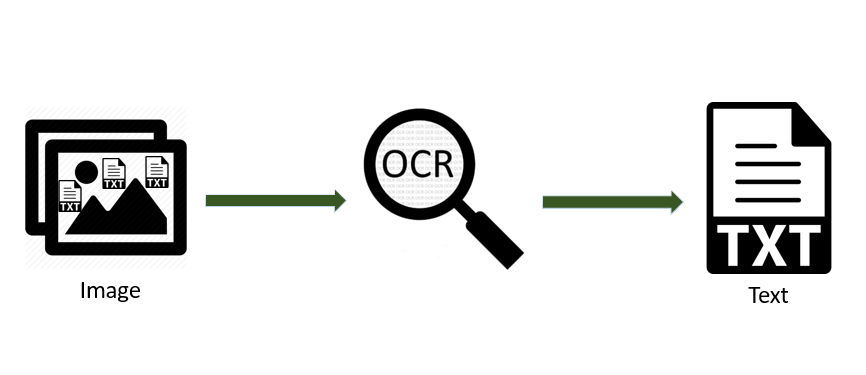

## Aplicaciones

Deteccion de placas vehiculares

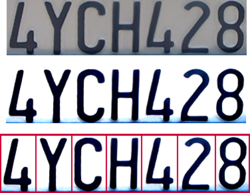

Captchas

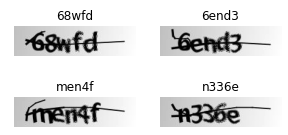

Google translate

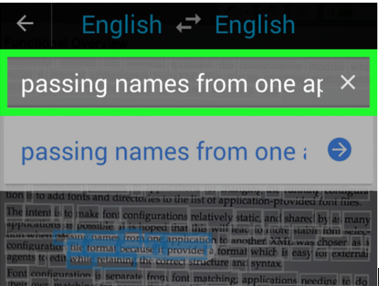

Análisis de documentos

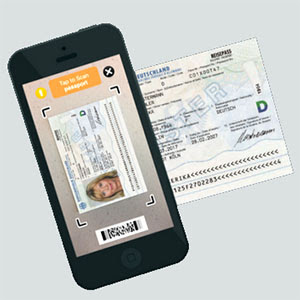

## Etapas de un sistema OCR


*   Pre-procesamiento de Imágen
*   Segmentación
*   Extracción de patrones:
    * métodos geométricos o estadísticos
    * métodos estructurales
    * métodos de ML

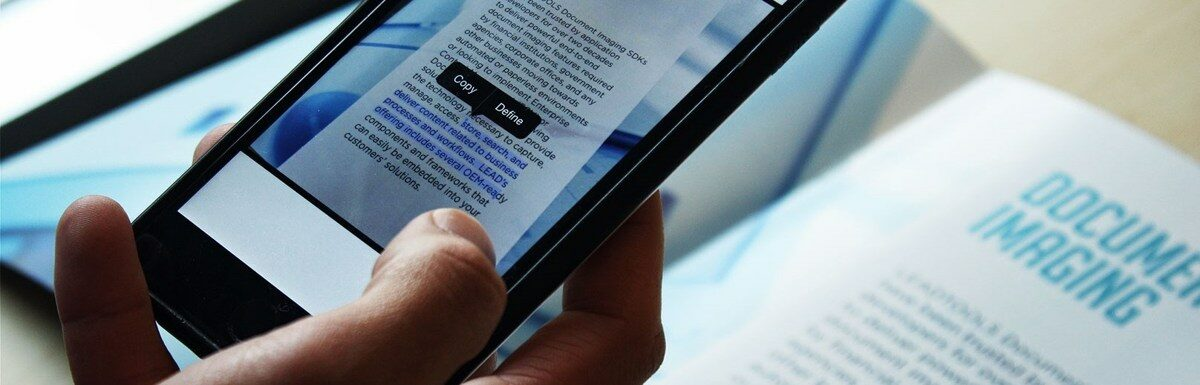


# Procesamiento de imágenes
Libreria OpenCV

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

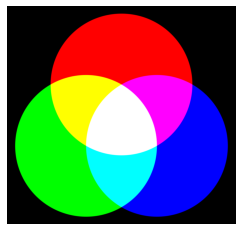

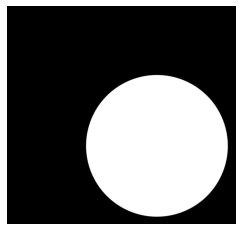

In [ ]:
im = cv2.imread("rgb-colores.png")#BGR
#cv2_imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #RGB
plt.imshow(im)
plt.axis("off")
plt.show()

plt.imshow(im[:,:,2],cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
im[200,500,:] #0-1

array([255,   0,   0], dtype=uint8)

tamaño= (230, 500, 3)


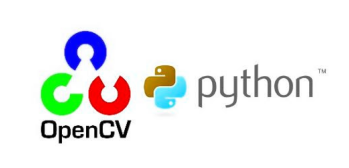

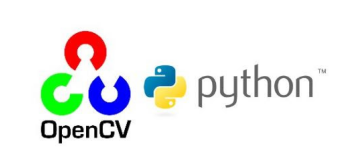

In [ ]:
im = cv2.imread("opencv.jpg", cv2.IMREAD_COLOR) #BGR
print("tamaño=", im.shape)
plt.imshow(im)
plt.axis("off")
plt.show()


im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #RGB
plt.imshow(im)
plt.axis("off")
plt.show()

## Operaciones Basicas


*   Escala de grises
*   Binarizacion
*   Filtros
*   Bordes

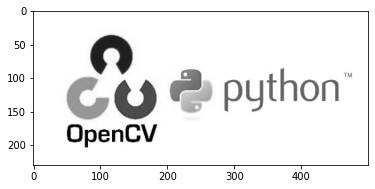

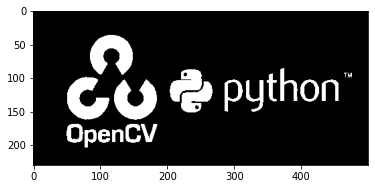

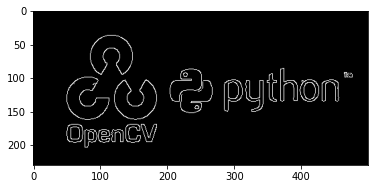

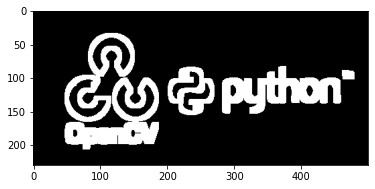

In [ ]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

thr,binary = cv2.threshold(np.invert(gray), 50, 255, cv2.THRESH_BINARY) #np.invert()
plt.imshow(binary,cmap='gray')
plt.show()

canny = cv2.Canny(gray, 10, 200) #10,20 #240,250 #164,250 
plt.imshow(canny,cmap='gray')
plt.show()

canny = cv2.dilate(canny, None, iterations=3)
plt.imshow(canny,cmap='gray')
plt.show()

# Redes Convolucionales CNN

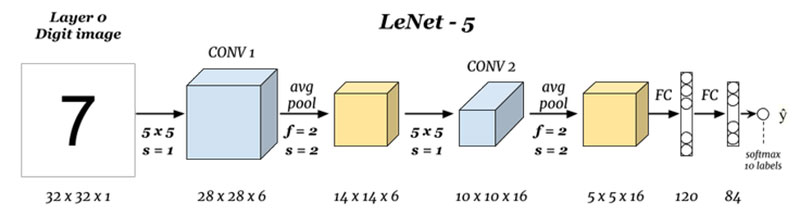

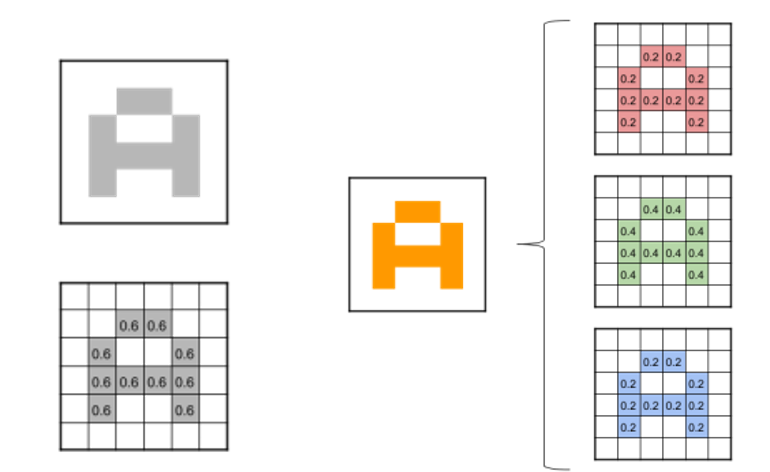

## Convolución 2D
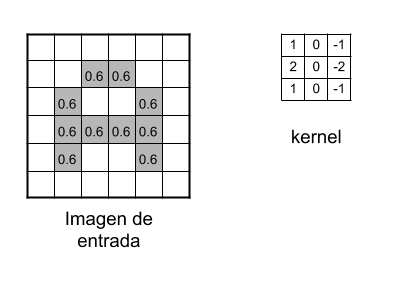

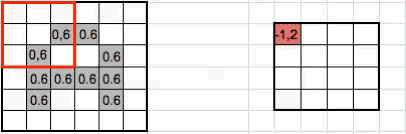

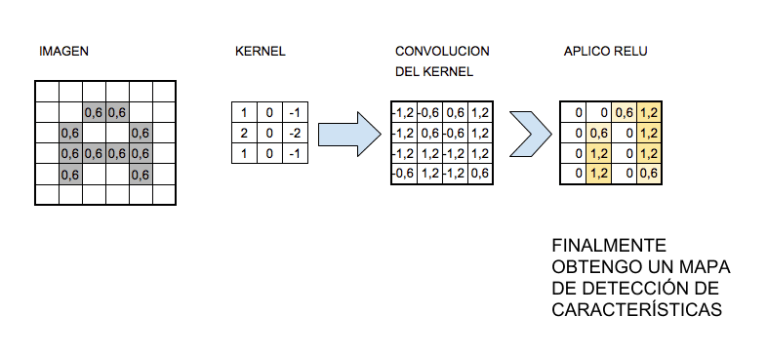

## Pooling, Muestreo(subsampling)

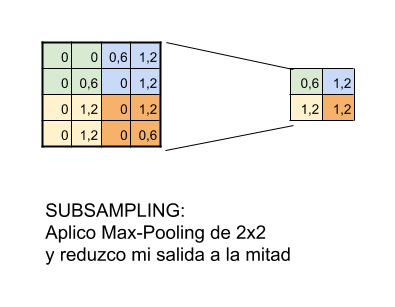

# Implementación de Arquitectura CNN

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_test, y_test),(x_train, y_train)= keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (10000, 28, 28, 1)
10000 train samples
60000 test samples


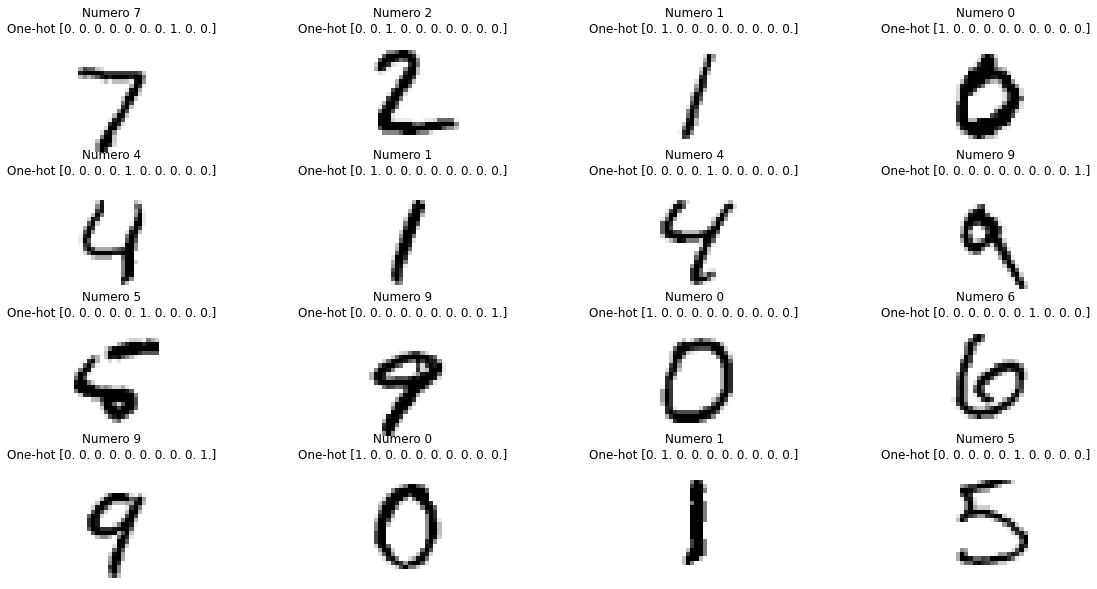

In [ ]:
x_train__ = x_train.reshape(x_train.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.axis("off")
    ax.imshow(x_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Numero {digit}\nOne-hot {y_train[i]}");

In [ ]:
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
N_classes = 10
model = keras.Sequential(name = "LeNet")

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu'))

model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=N_classes, activation = 'softmax'))

model.summary()

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 12)        660       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 120)               36120 

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
71/71 [==============================] - 10s 8ms/step - loss: 1.1265 - accuracy: 0.6762 - val_loss: 0.4588 - val_accuracy: 0.8650
Epoch 2/15
71/71 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.8993 - val_loss: 0.3414 - val_accuracy: 0.8970
Epoch 3/15
71/71 [==============================] - 0s 4ms/step - loss: 0.2118 - accuracy: 0.9372 - val_loss: 0.2252 - val_accuracy: 0.9350
Epoch 4/15
71/71 [==============================] - 0s 4ms/step - loss: 0.1573 - accuracy: 0.9531 - val_loss: 0.1940 - val_accuracy: 0.9450
Epoch 5/15
71/71 [==============================] - 0s 4ms/step - loss: 0.1218 - accuracy: 0.9638 - val_loss: 0.1798 - val_accuracy: 0.9420
Epoch 6/15
71/71 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9728 - val_loss: 0.1492 - val_accuracy: 0.9520
Epoch 7/15
71/71 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9746 - val_loss: 0.1416 - val_accuracy: 0.9620
Epoch 8/15
71/71 [=

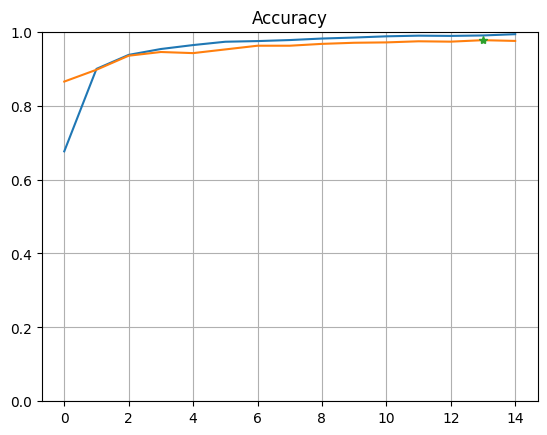

In [ ]:
from keras import metrics
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

epoch_max = np.argmax(h.history['val_accuracy'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(epoch_max, h.history['val_accuracy'][epoch_max],'*')
plt.title('Accuracy')
plt.ylim(0,1.00)
plt.grid()

plt.show()

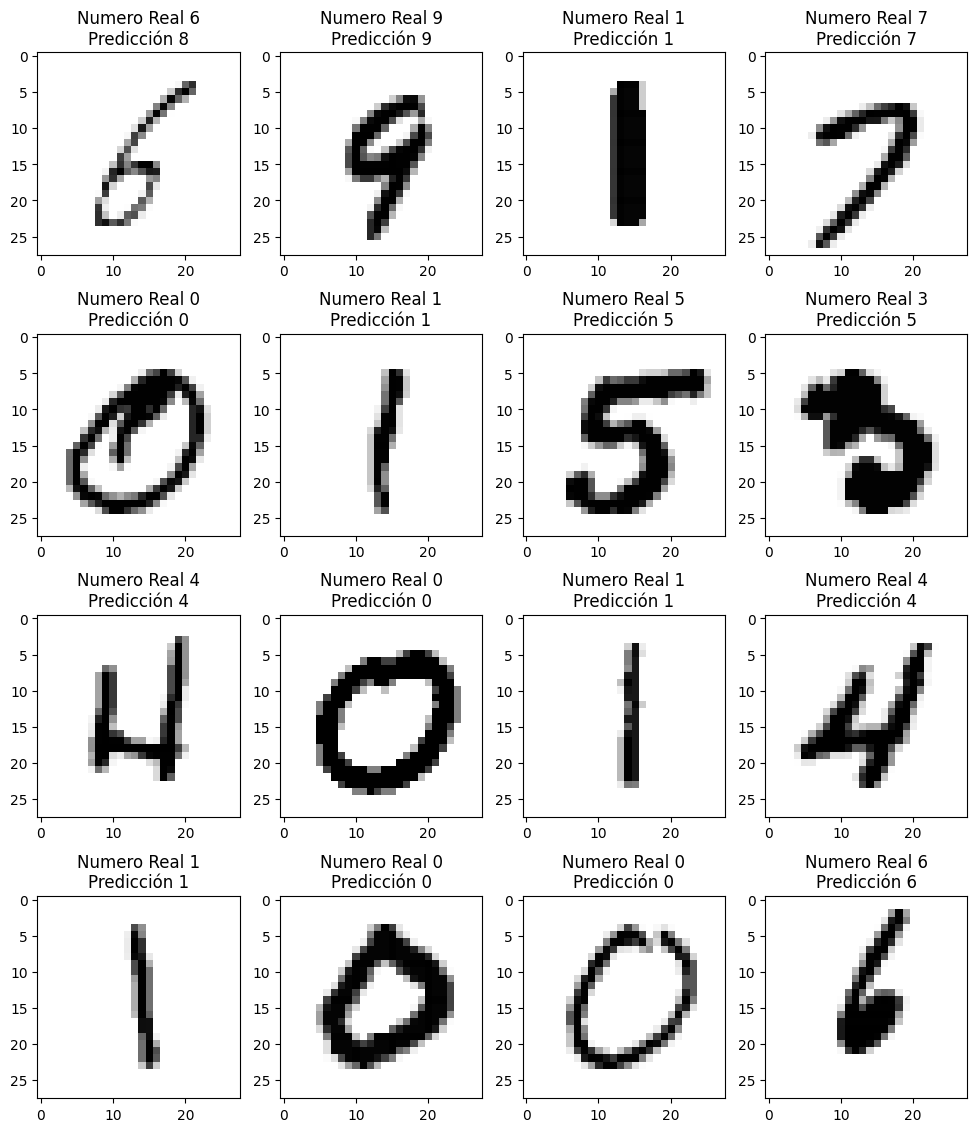

In [ ]:
import random
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ri= random.randint(0, x_test.shape[0])
    ax.imshow(X_test__[ri], cmap='binary')
    ax.set(title = f"Numero Real {y_test[ri].argmax()}\nPredicción {y_pred[ri].argmax()}");

# ¿Cómo reconocer varios caracteres en una misma imagen?


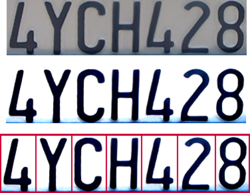

# CNN + RNN (LSTM) = CRNN

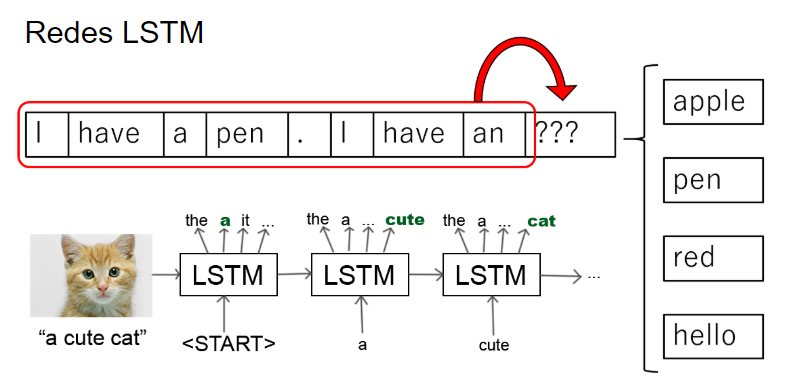

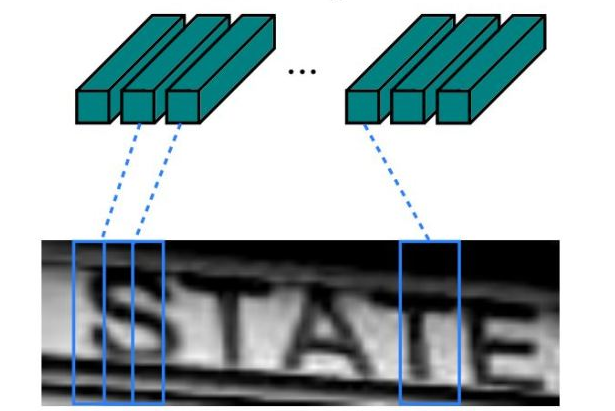

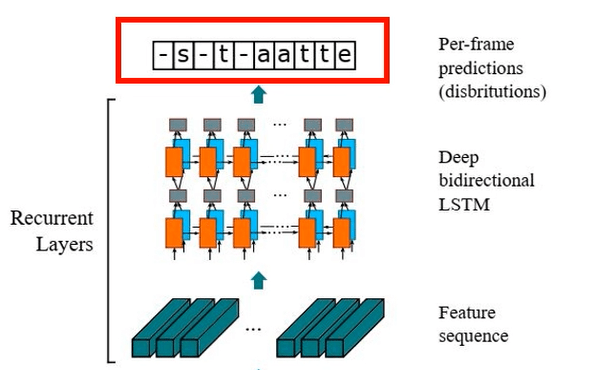

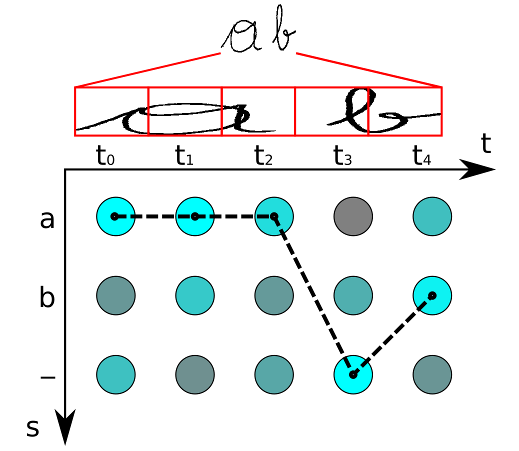

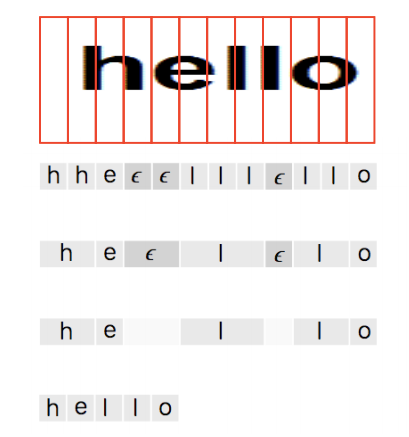

# Motores OCR 

* Keras-ocr
* tesseract-ocr
* easyocr
* SimpleOCR
* ABBY

In [ ]:
!pip install -q keras-ocr

     |████████████████████████████████| 41 kB 125 kB/s 
     |████████████████████████████████| 603 kB 6.6 MB/s 
     |████████████████████████████████| 9.5 MB 12.9 MB/s 
     |████████████████████████████████| 900 kB 48.4 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 


In [ ]:
import matplotlib.pyplot as plt

import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()
images = [
    keras_ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
    ]]
prediction_groups= pipeline.recognize(images)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


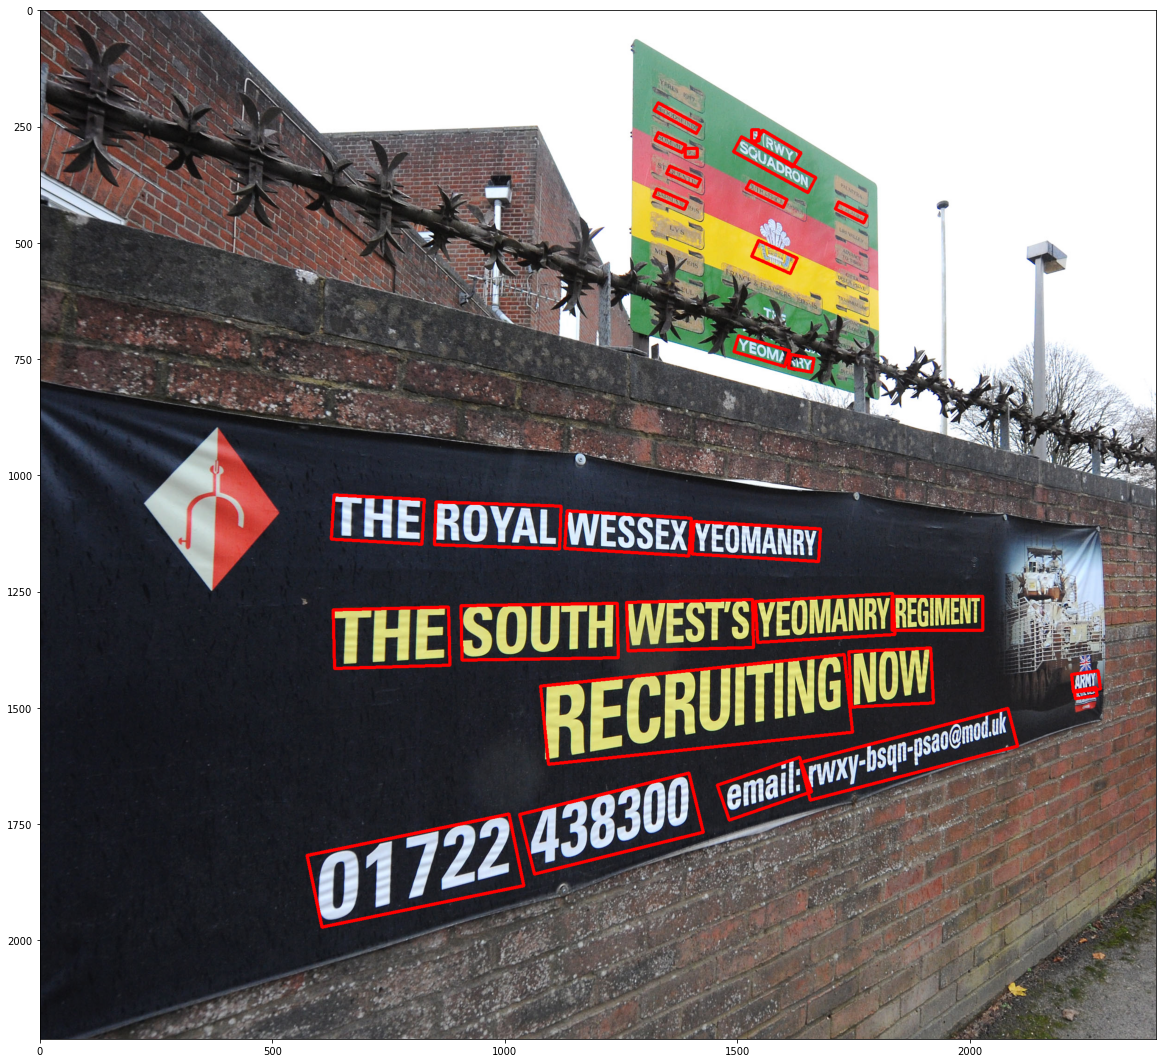

In [ ]:
prediction_groups= pipeline.recognize(images)
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
axs.imshow(keras_ocr.tools.drawBoxes(image=images[0], boxes=prediction_groups[0], boxes_format="predictions"))

In [ ]:
for word, box in prediction_groups[0]:
  print(word)

toodstande
s
somme
srny
squadron
ds
quentn
snhnen
bnpnone
sasne
taing
yeoms
sry
the
royal
wessex
yeomanry
regiment
yeomanry
wests
south
the
now
recruiting
arm
blon
wxybsqipsacomodn
email
438300
01722
